In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

# Problem description
section 4.3 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
params = ob.mcf_params(num_vertices=100, num_edges=1000, M=10)

# Distributed solution

In [3]:
agents = ob.mcf_agents(params)
g = ob.mcf_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [6]:
x_agent, x_global = prob.solve(rel_gap = 10**(-5), abs_gap = 10**(-5), max_iter=30)

k=0, rel_gap=2139.3874511502354, L=-20000.0, U=-9.344102624621575
k=1, rel_gap=7.824415251186307, L=-82.45624170936063, U=-9.344102624621575
k=2, rel_gap=4.426907428583008, L=-81.26246833372889, U=-14.973991984039962
k=3, rel_gap=0.9616984892802104, L=-81.26246833377078, U=-41.424545503722
k=4, rel_gap=0.4664144806995025, L=-81.26246833374637, U=-55.41575687044696
k=5, rel_gap=0.2879432972366257, L=-81.2624683337313, U=-63.094756196243836


/opt/anaconda3/lib/python3.9/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=6, rel_gap=0.18458895835091227, L=-81.26246833375762, U=-68.5997178691287
k=7, rel_gap=0.12158169872684024, L=-80.8036295480532, U=-72.04435453946616
k=8, rel_gap=0.08470774129968829, L=-79.76321389035186, U=-73.5342902547927
k=9, rel_gap=0.06943186900689809, L=-79.2621180167857, U=-74.11609875661415
k=10, rel_gap=0.03743496956454515, L=-78.00664121153599, U=-75.19183707898206
k=11, rel_gap=0.02496192753787368, L=-77.65051872015304, U=-75.75941762703548
k=12, rel_gap=0.01615051747755804, L=-77.53422077598701, U=-76.30190551735794
k=13, rel_gap=0.010703848208413583, L=-77.4437145852487, U=-76.62354776082668
k=14, rel_gap=0.00868883952378052, L=-77.43341831177617, U=-76.76640731777485
k=15, rel_gap=0.006658205015749352, L=-77.36139847668335, U=-76.84971730347443
k=16, rel_gap=0.005271064862344222, L=-77.31767918311735, U=-76.91226962123372
k=17, rel_gap=0.002789829986531432, L=-77.20557445106269, U=-76.99078325525065
k=18, rel_gap=0.0021913222180372123, L=-77.20555209072643, U=-77.0367

# Centralized solution

In [7]:
x_cvx, prob_cvx, h_cvx = ob.cvx_multi_commodity_flow(params=params)

In [8]:
h_cvx, prob.upper_bnd[-1]

(-77.11857014240512, -77.08632039856143)

# Plot

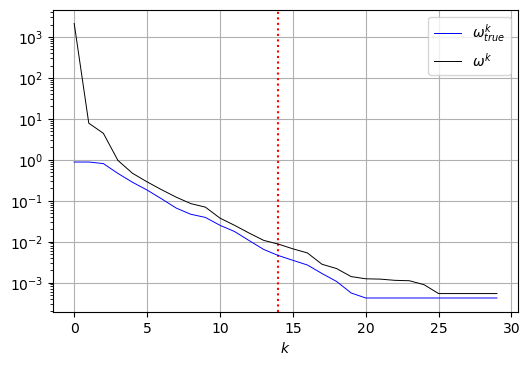

In [9]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)